# Math 6375 Term Project: Heart Disease

###### Myranda Alvarez, Lavinia Radu, Alondra Rodriguez

## Logistic Regression

In [408]:
# Importing Necessary Imports

# Loading Dataset Imports
import pandas as pd
import numpy as np

# Loading Visualizations Imports 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Splitting Imports
from sklearn.model_selection import train_test_split

# Data Model Imports
from sklearn.linear_model import LogisticRegression

# Metrics Imports
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn import metrics

#Classification Report
from sklearn.metrics import classification_report

In [416]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking the number of unique value in each column
{column: len(X[column].unique()) for column in X.columns}

In [338]:
data.shape

(303, 14)

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [342]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Data Visualizations

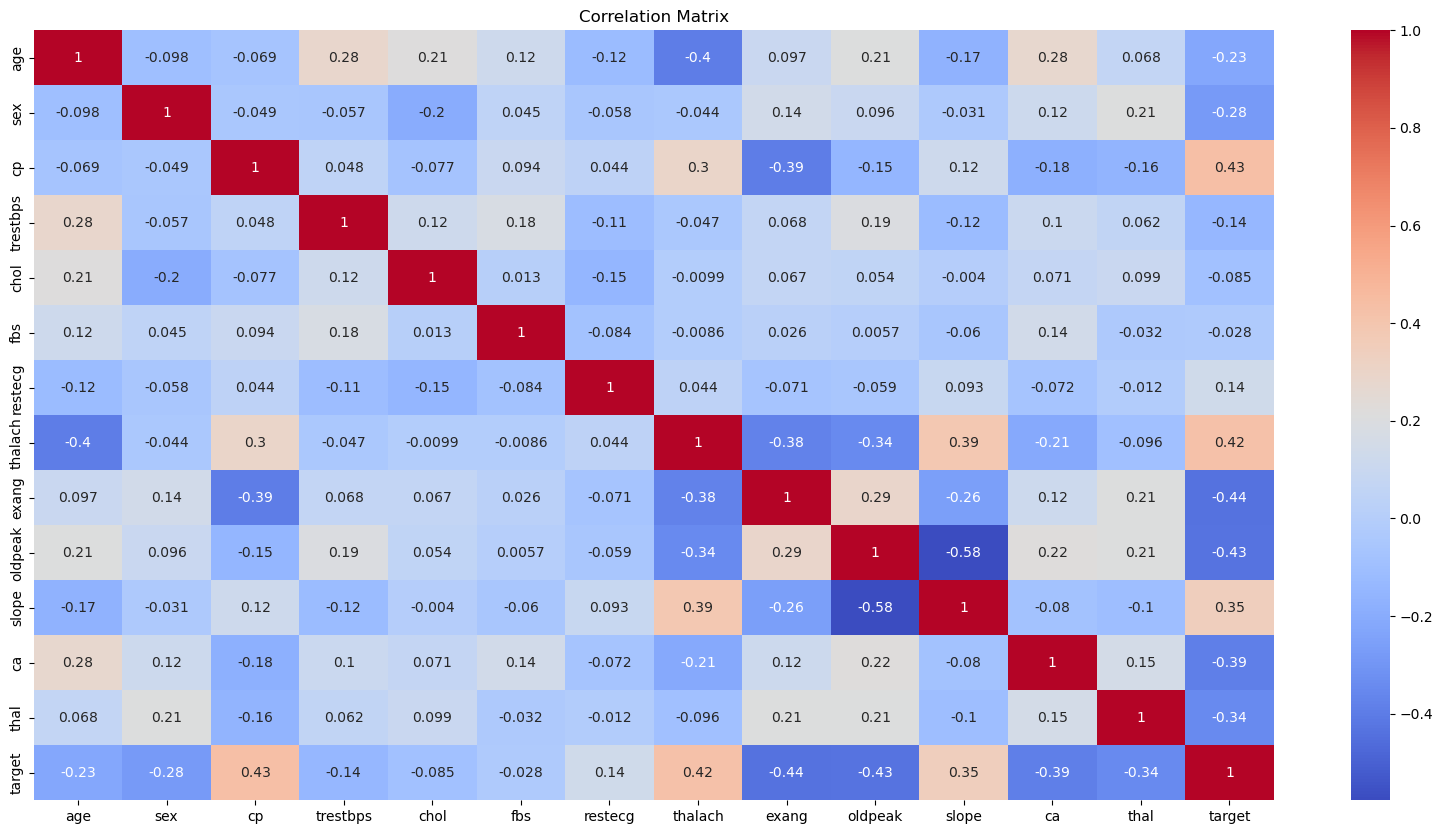

In [344]:
# Correlation headmap
corr_matrix = data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#(I observe positive correlation between target and cp, thalach, slope and negative correlation between target and sex, exang, ca, thai, oldpeak)

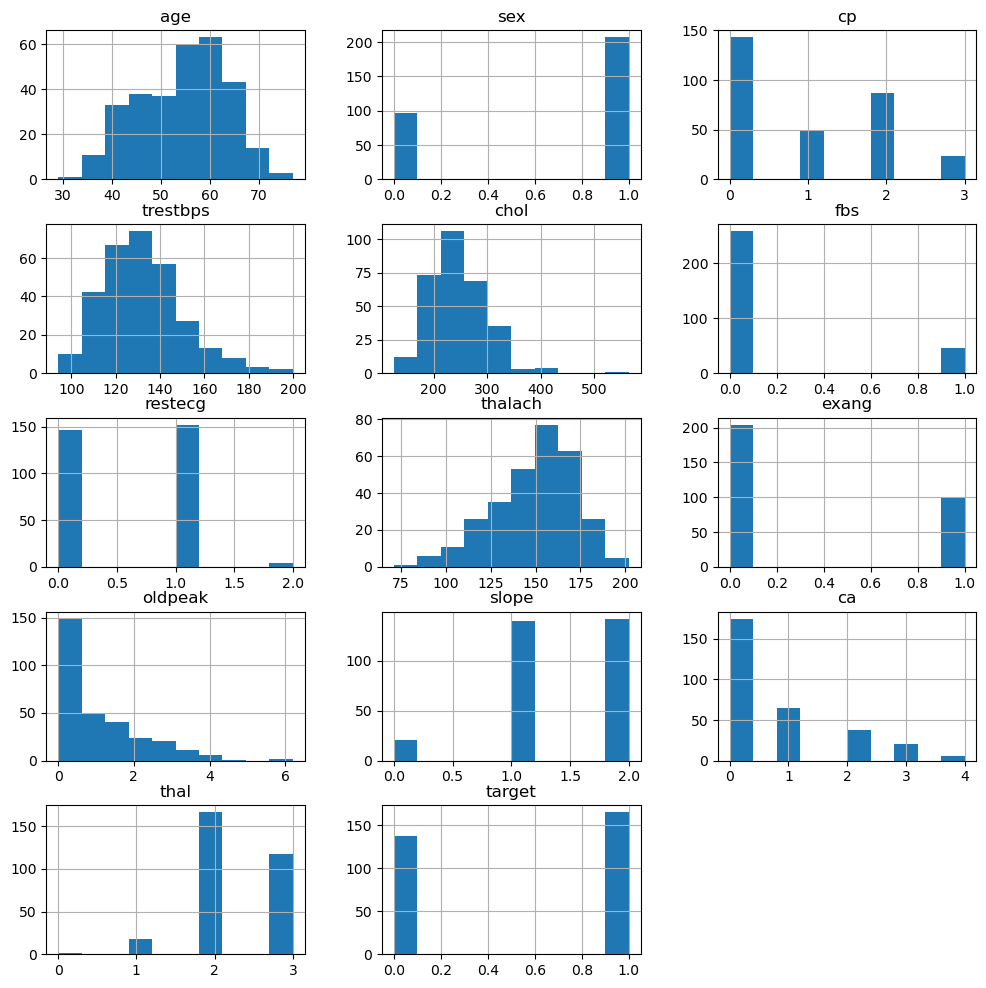

In [231]:
# Plot histrogram for whole data set using hist()
data.hist(figsize=(12,12), layout=(5,3))
plt.show()

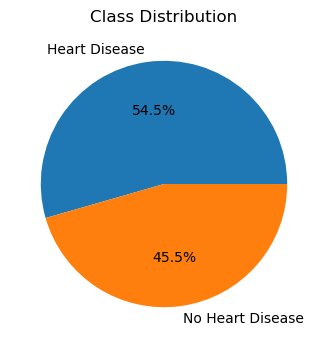

In [233]:
# Class distribution
plt.figure(figsize=(4,4))
plt.pie(data['target'].value_counts(), labels=['Heart Disease', 'No Heart Disease'], autopct='%.1f%%')
plt.title('Class Distribution')
plt.show()

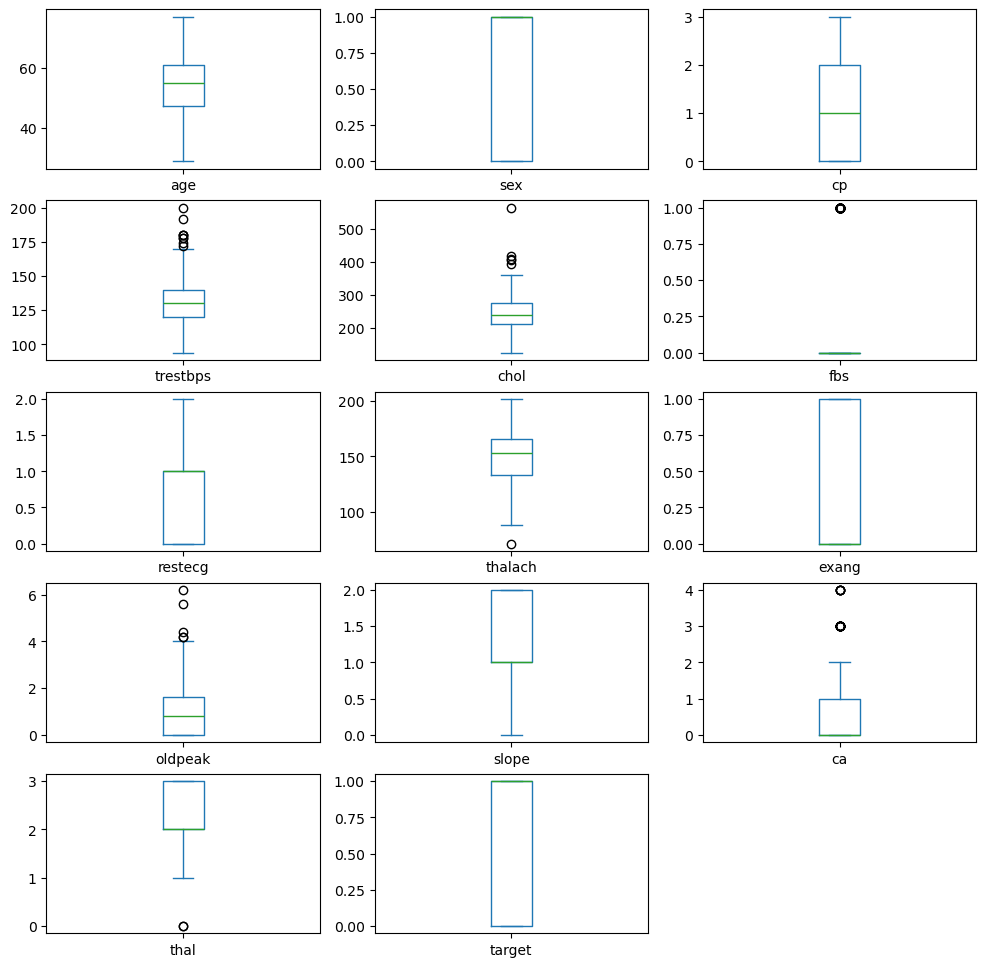

In [235]:
# BoxPlot Graph 
data.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [ ]:
# Checking if there are any NULL values
missing_values = data.isnull().sum()
print(missing_values)

#### Data Preprocessing

In [420]:
# Initiating the Scaler
scaler = StandardScaler()

# Numerical Features of the Scale
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# We are applying scaling here
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [422]:
# Using one-hot encoding
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns = categorical_features)

In [374]:
# Making sure that it transformed
print(data.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  target  \
0  0.952197    1  0.763956 -0.256334    1  0.015443      0  1.087338       1   
1 -1.915313    1 -0.092738  0.072199    0  1.633471      0  2.122573       1   
2 -1.474158    0 -0.092738 -0.816773    0  0.977514      0  0.310912       1   
3  0.180175    1 -0.663867 -0.198357    0  1.239897      0 -0.206705       1   
4  0.290464    0 -0.663867  2.082050    0  0.583939      1 -0.379244       1   

    cp_0  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
0  False  ...    False  True  False  False  False  False   False    True   
1  False  ...    False  True  False  False  False  False   False   False   
2  False  ...     True  True  False  False  False  False   False   False   
3  False  ...     True  True  False  False  False  False   False   False   
4   True  ...     True  True  False  False  False  False   False   False   

   thal_2  thal_3  
0   False   False  
1    True   False  
2 

In [424]:
# Converting the True/False into Integers
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col].astype(int)

In [426]:
X = data.drop('target', axis=1)  
y = data['target']      

#### Split the Data

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Comparison Algorithm I: Logistic Regression

In [430]:
# Using Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [432]:
# Making Predictions
lr_predictions = lr.predict(X_test)

In [434]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Accuracy: {lr_accuracy:.2f}")

# Generate a Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print("Confusion Matrix:")
print(lr_conf_matrix)

Accuracy: 0.89
Confusion Matrix:
[[26  3]
 [ 4 28]]


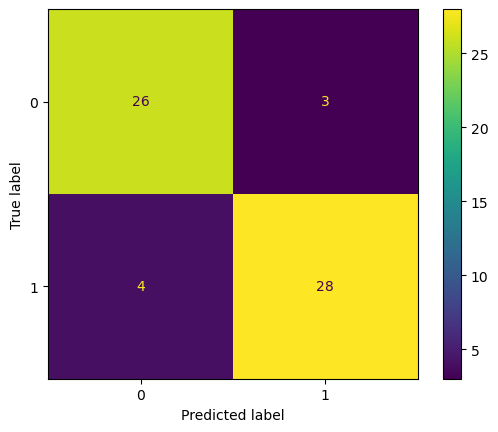

In [436]:
# Visualize Confusion Matrix
lr_confusion_matrix = metrics.confusion_matrix(y_test, lr_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [438]:
# Classification report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



## Gaussian Naive Bayes

In [390]:
# Importing Naive Bayes Regression
from sklearn.naive_bayes import GaussianNB

In [392]:
# Reload data- not affected by the preprocessing of logistic regression
data = pd.read_csv('heart.csv')

In [394]:
# Extract Features and Labels
X=data.drop('target',axis=1)
y=data['target']

In [396]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [398]:
# Inititalize the Gaussian Naive Bayes Classifier
GNB=GaussianNB()

In [400]:
# Train the Model
GNB.fit(X_train,y_train)

GaussianNB()

In [402]:
# Predict the labels for the test set
gnb_predictions=GNB.predict(X_test)

In [404]:
# Calculate accuracy
gnb_accuracy = accuracy_score(y_test,gnb_predictions)
print(f"Accuracy: {gnb_accuracy:.2f}")

# Generate a confusion matrix
gnb_conf_matrix = confusion_matrix(y_test, gnb_predictions)
print("Confusion Matrix:")
print(gnb_conf_matrix)

Accuracy: 0.84
Confusion Matrix:
[[36  5]
 [10 40]]


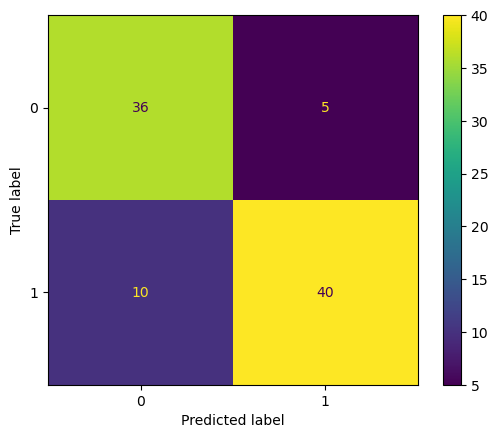

In [406]:
# Visualize Confusion Matrix

gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [412]:
# Classification report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

